In [1]:
import sys
import os



# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join( '..')))

In [2]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 2\playstore-bank-reviews\data\reviews_sentiment_comparison.csv', encoding='utf-8')
print(df.head())


                                              review  rating        date bank  \
0  "Why don’t your ATMs support account-to-accoun...       4  2025-06-06  CBE   
1                        what is this app problem???       1  2025-06-05  CBE   
2       the app is proactive and a good connections.       5  2025-06-05  CBE   
3    I cannot send to cbebirr app. through this app.       3  2025-06-05  CBE   
4                                     not functional       1  2025-06-05  CBE   

  scrape_lang       source detected_language vader_sentiment  \
0          en  Google Play                en        POSITIVE   
1          en  Google Play                en        NEGATIVE   
2          en  Google Play                en        POSITIVE   
3          en  Google Play                en         NEUTRAL   
4          en  Google Play                en         NEUTRAL   

  textblob_sentiment distilbert_sentiment  
0           NEGATIVE             NEGATIVE  
1            NEUTRAL             NEGATIV

In [3]:
from src.lemmatize import clean_lemmatize
import spacy



# Focus on English reviews for this example
english_reviews = df[df['detected_language'] == 'en']['review'].dropna().astype(str)
english_reviews_clean = english_reviews.apply(clean_lemmatize)

Tokenization:
TfidfVectorizer splits each review into tokens (words and bigrams) automatically.

Stop-word Removal:
With stop_words='english', scikit-learn uses its built-in list to filter out common English words.



In [4]:
from src.topic_modeling import extract_top_tfidf_ngrams , nmf_topic_modeling,assign_and_show_sample_reviews
# 1. Get TF-IDF matrix and feature names
tfidf_matrix, features, texts = extract_top_tfidf_ngrams(
    df,
    text_col='review',
    lang_col='detected_language',
    language='en',
    ngram_range=(1,2),
    stop_words='english',
    min_df=3,
    max_features=100,
    return_matrix=True
)


In [5]:
# Step 2: Run NMF topic modeling
n_topics = 5
nmf_model, W, topics = nmf_topic_modeling(
    tfidf_matrix=tfidf_matrix,
    feature_names=features,
    n_topics=n_topics,
    n_top_words=10
)



In [6]:
# 3. Print topics and keywords
for topic_num, top_keywords in topics:
    print(f"Topic #{topic_num}: {', '.join(top_keywords)}")


Topic #1: app, nice, good app, great, nice app, update, worst, best app, like, amazing
Topic #2: good, good app, service, application, work, time, network, times, add, transaction
Topic #3: best, best app, application, ethiopia, apps, life, banking app, digital, wow, thank
Topic #4: use, easy, easy use, fast, simple, nice, super, life, secure, use app
Topic #5: bank, banking, application, mobile, mobile banking, cbe, work, ethiopia, working, banking app


## Topic Modeling Results (NMF)

The following summarizes the five main topics extracted from app review data using Non-Negative Matrix Factorization (NMF). Each topic is represented by its top keywords, with interpretation and business-relevant themes suggested for each group.

| Topic # | Top Keywords                                                        | Interpretation & Likely Themes                         |
### Topic Highlights

- **Topic 1:** Focuses on performance problems, slowness, and update complaints, with BOA mentioned often.
- **Topic 2:** Captures usability and "super app" experience, centered on Dashen Bank.
- **Topic 3:** Reflects a mix of positive and negative feedback about app functionality and feature options.
- **Topic 4:** Emphasizes issues with mobile banking access and negative app experiences, especially with BOA.
- **Topic 5:** Covers positive reviews, especially about transactions and app updates, often mentioning BOA.


In [7]:
# Step 3: Assign topics to reviews and print sample reviews per topic
assign_and_show_sample_reviews(
    df=df,
    W=W,
    reviews_idx=english_reviews.index,
    n_topics=5,
    n_samples=3,
    text_col='review'
)

# (Optional) Print top keywords for each topic
for topic_num, top_keywords in topics:
    print(f"Topic #{topic_num}: {', '.join(top_keywords)}")


Topic #1 sample reviews:
- what is this app problem???
- I cannot send to cbebirr app. through this app.
- not functional

Topic #2 sample reviews:
- the app is proactive and a good connections.
- it was good app but it have some issues like it doesnt give me the right amount that I have in the bank and have some issues in transferring
- It's good but try to make it facilitate for your client

Topic #3 sample reviews:
- best app of finance
- wow best application ever
- Best the best fast

Topic #4 sample reviews:
- It makes life easy!👌
- its not fast
- user-friendly apps.because this app is easy.

Topic #5 sample reviews:
- "Why don’t your ATMs support account-to-account transfers like other countries( Kenya, Nigeria , South africa)"
- it is like a childish app make it better the worst I have ever seen
- It's a problem solver application, go ahead CBE, I love so much.
Topic #1: app, nice, good app, great, nice app, update, worst, best app, like, amazing
Topic #2: good, good app, servi

## Observations from Topic Modeling

While topic modeling (NMF) helped to surface high-frequency keywords and broad groupings, the resulting topics were notably mixed in sentiment and content. For example:

- Some topics contain both strong praise ("very usefully app", "improved to be the best") and harsh criticism ("worest app 24/7 loading", "app crashes").
- Issues and features are often mentioned in the same review (e.g., "Best app, somehow waiting a few minutes").
- Certain topics cluster reviews by bank (e.g., BOA, Dashen) but not always by a single concern.

This reflects a real-world truth: **user reviews frequently blend different feedback types in a single comment**.

## Recommendation: Combine Topic Modeling with Rule-Based Thematic Grouping

To generate more actionable insights, I will complement topic modeling with **manual and rule-based theme assignment**. This involves:

- Defining key business-driven themes (e.g., 'Account Access Issues', 'Transaction Performance', 'User Experience', 'Customer Support', 'Feature Requests').
- Assigning reviews to one or more themes based on the presence of specific keywords or phrases, regardless of their NMF topic assignment.

This hybrid approach ensures that **all critical user concerns are surfaced and quantified for each bank, and mapped directly to actionable areas for product, engineering, and marketing teams**.

> *Topic modeling is a valuable exploration tool, but for business decision-making in banking apps, clear theme definitions and targeted keyword-based grouping are essential.*


In [8]:
themes = {
    "Transaction & Performance Issues": [
        "slow", "loading", "lag", "transfer", "transaction", "transactions", "payment", "time", "failed", "crash", "hang", "doesn work", "not working", "system down", "freeze"
    ],
    "Feature Requests & Enhancements": [
        "feature", "request", "add", "update", "fingerprint", "option", "new", "statement", "improve", "fast", "better", "support", "enhancement", "more", "wish"
    ],
    "Access & Support Issues": [
        "login", "password", "register", "registration", "can’t access", "access", "error", "help", "support", "customer", "response", "chatbot", "complaint", "cannot login", "locked", "contact"
    ],
     "General Praise ": [
        "good", "best", "super", "great", "interested", "improved", "friendly", "really", "like"
    ],
    "User Interface & Experience": [
        "ui", "ux", "user", "user friendly", "easy", "easy use", "interface", "design", "layout", "navigation", "experience", "super app", "mobile", "application", "app", "mobile banking", "banking app", "confusing", "better", "like", "great", "best", "really", "just"
    ]
}
def assign_themes(text):
    text = text.lower()
    found = []
    for theme, keywords in themes.items():
        if any(kw in text for kw in keywords):
            found.append(theme)
    return found if found else ['Other']

df['themes'] = df['review'].astype(str).apply(assign_themes)


In [9]:
df_exploded = df.explode('themes')
themes_by_bank = df_exploded.groupby(['bank', 'themes']).size().unstack(fill_value=0)
print(themes_by_bank)

themes  Access & Support Issues  Feature Requests & Enhancements  \
bank                                                               
BOA                          73                              195   
CBE                         170                              483   
Dashen                       34                              119   

themes  General Praise   Other  Transaction & Performance Issues  \
bank                                                               
BOA                 171     90                               198   
CBE                 645    337                               450   
Dashen              166     32                                89   

themes  User Interface & Experience  
bank                                 
BOA                             447  
CBE                            1156  
Dashen                          240  


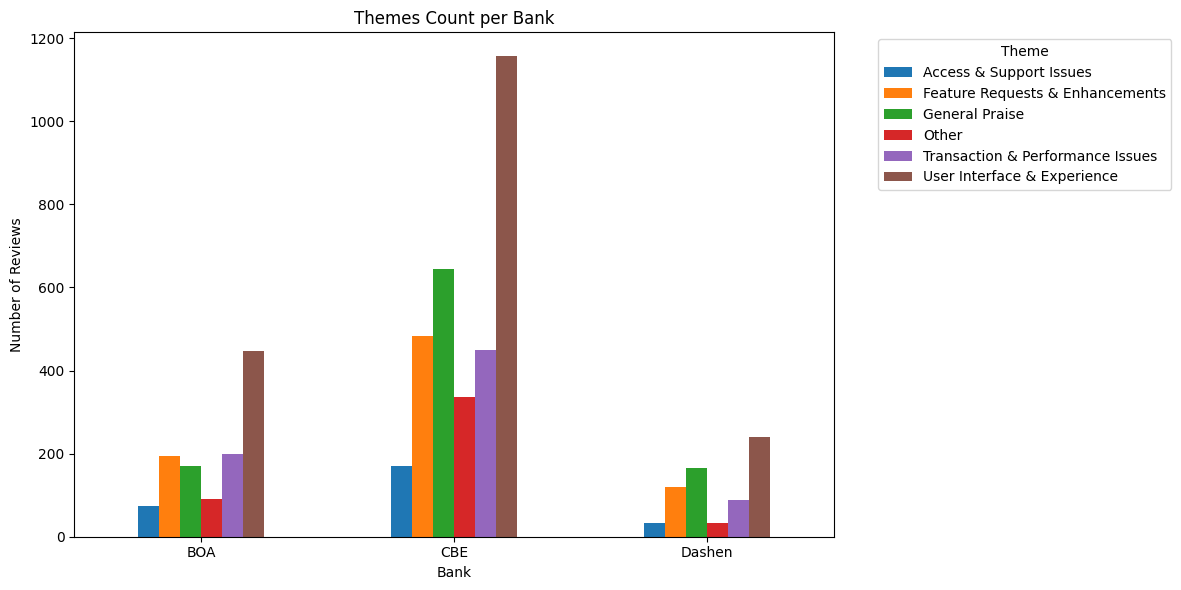

In [10]:
import matplotlib.pyplot as plt

themes_by_bank.plot(kind='bar', figsize=(12,6))
plt.title('Themes Count per Bank')
plt.ylabel('Number of Reviews')
plt.xlabel('Bank')
plt.xticks(rotation=0)
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


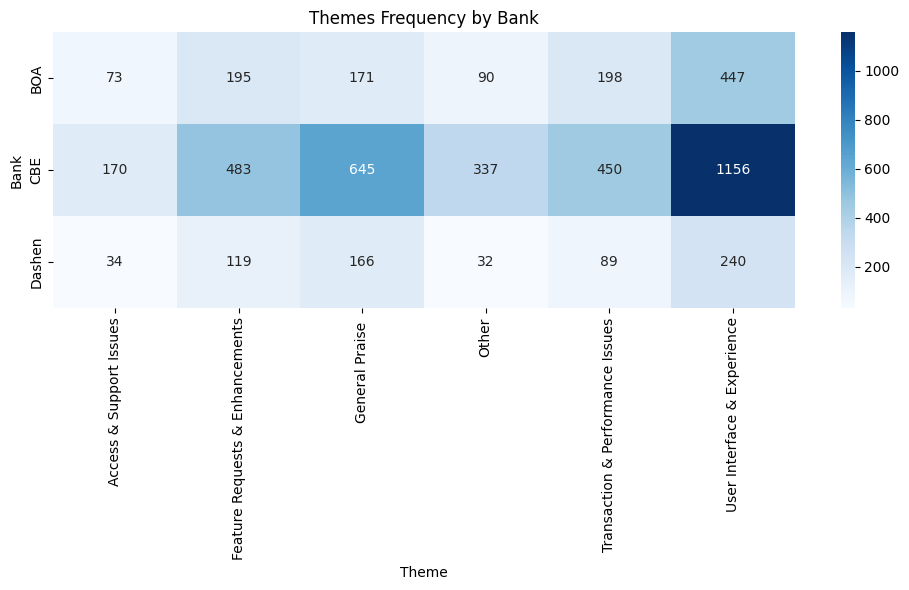

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(themes_by_bank, annot=True, fmt='d', cmap='Blues')
plt.title('Themes Frequency by Bank')
plt.xlabel('Theme')
plt.ylabel('Bank')
plt.tight_layout()
plt.show()


In [3]:
from src.sentiment_ranking_comparison import sentiment_star_counts
# Usage
sentiment_by_star = sentiment_star_counts(df)
print(sentiment_by_star)

distilbert_sentiment  NEGATIVE  POSITIVE
rating                                  
5                          246      1252
4                          102       116
3                          152        39
2                          140        23
1                          702        67
